In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from env import host, user, password
from pydataset import data
import acquire
import prepare

from prepare import percentage_stacked_plot
from prepare import draw_roc

# Step 1 - Acquire Data

#### Displaying and inspecting data before prepare phase

In [2]:
telco_df = acquire.get_telco_data()
telco_df.head()

,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
payment_type_id,,,,,,,,,,,,,,,,,,,,,
2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [3]:
telco_df.head().T

payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
internet_service_type_id,1,1,2,2,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No


## Data Dictionary

### What does each column title represent?

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 2 to 1
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   contract_type_id          7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14  streaming_t

# Step 2 - Prepare Data

### Here is where I will clean and prepare the data before analysis

In [5]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### no missing data

In [6]:
telco_df.isna().sum()

contract_type_id            0
internet_service_type_id    0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
internet_service_type       0
contract_type               0
payment_type                0
dtype: int64

Text(0.5, 1.02, 'Count of TARGET Variable per category')

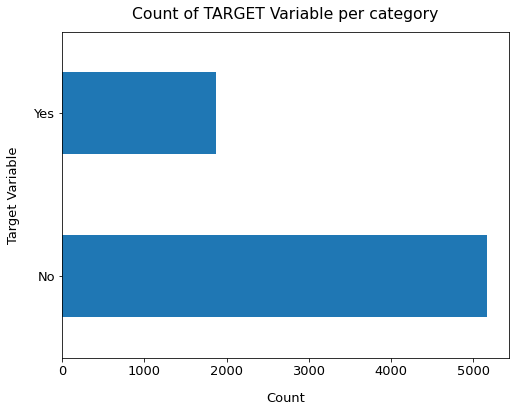

In [7]:
telco_df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [8]:
telco_df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [9]:
telco_df['churn'].value_counts()/len(telco_df['churn'])*100

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

#### 26.5% totaling 1869 of customers from this data set have churned.

#### Here I will convert the total_charges column to a numeric value and find the nulls

In [10]:
telco_df.total_charges = pd.to_numeric(telco_df.total_charges, errors='coerce')
telco_df.isnull().sum()

contract_type_id             0
internet_service_type_id     0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
internet_service_type        0
contract_type                0
payment_type                 0
dtype: int64

### What do these nulls look like?

In [11]:
telco_df.loc[telco_df ['total_charges'].isnull() == True]

,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
payment_type_id,,,,,,,,,,,,,,,,,,,,,
4,3,1,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,...,Yes,Yes,No,No,56.05,NaN,No,DSL,Two year,Credit card (automatic)
2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,No,20.00,NaN,No,None,Two year,Mailed check
3,3,1,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,...,Yes,No,No,Yes,61.90,NaN,No,DSL,Two year,Bank transfer (automatic)
2,2,3,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,Yes,19.70,NaN,No,None,One year,Mailed check
2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,No,...,No internet service,No internet service,No internet service,No,20.25,NaN,No,None,Two year,Mailed check
2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,No,25.35,NaN,No,None,Two year,Mailed check
2,3,1,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,...,Yes,Yes,No,No,73.35,NaN,No,DSL,Two year,Mailed check
2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,...,No internet service,No internet service,No internet service,No,25.75,NaN,No,None,Two year,Mailed check
3,3,1,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,...,Yes,Yes,No,Yes,52.55,NaN,No,DSL,Two year,Bank transfer (automatic)


In [12]:
telco_df.dtypes

contract_type_id              int64
internet_service_type_id      int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges               float64
churn                        object
internet_service_type        object
contract_type                object
payment_type                 object
dtype: object

In [13]:
telco_df.total_charges.where((telco_df.total_charges == 'NaN'),0)

payment_type_id
2    0.0
2    0.0
1    0.0
1    0.0
2    0.0
    ... 
2    0.0
1    0.0
2    0.0
2    0.0
1    0.0
Name: total_charges, Length: 7043, dtype: float64

#### Need to move payment_type_id to column and not index

In [14]:
telco_df.reset_index(inplace=True)

#### Removing null values for further preparing

In [15]:
telco_df.dropna(how = 'any', inplace = True)

#### Dropping unnecessary columns and adding categories

In [16]:
telco_df = telco_df.rename(columns = {'tenure':'tenure_mths'})

In [17]:
#telco_data.drop(columns= ['customer_id'], axis=1, inplace=True)
telco_df.head(10)

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure_mths,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.30,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.40,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.40,Yes,Fiber optic,Month-to-month,Mailed check
5,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.40,571.45,No,DSL,Month-to-month,Credit card (automatic)
6,3,3,2,0013-SMEOE,Female,1,Yes,No,71,Yes,...,Yes,Yes,Yes,Yes,109.70,7904.25,No,Fiber optic,Two year,Bank transfer (automatic)
7,4,3,2,0014-BMAQU,Male,0,Yes,No,63,Yes,...,Yes,No,No,Yes,84.65,5377.80,No,Fiber optic,Two year,Credit card (automatic)
8,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.20,340.35,No,DSL,Month-to-month,Electronic check
9,2,3,1,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,DSL,Two year,Mailed check


In [18]:
numcols = [col for col in telco_df.columns if telco_df[col].dtype !='O']
numcols

['payment_type_id',
 'contract_type_id',
 'internet_service_type_id',
 'senior_citizen',
 'tenure_mths',
 'monthly_charges',
 'total_charges']

payment_type_id


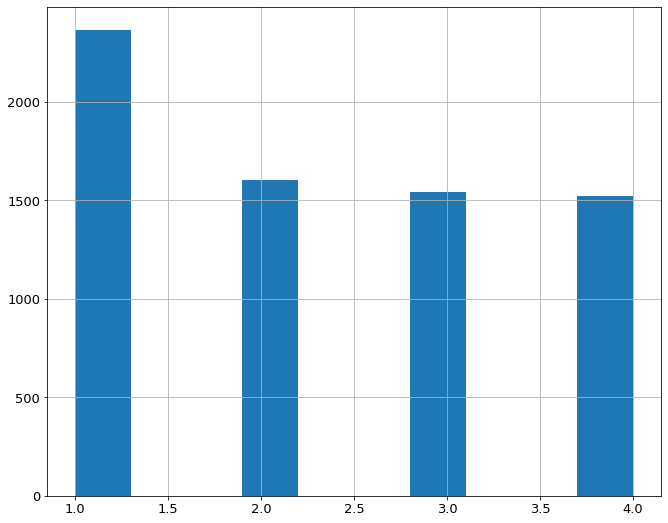

contract_type_id


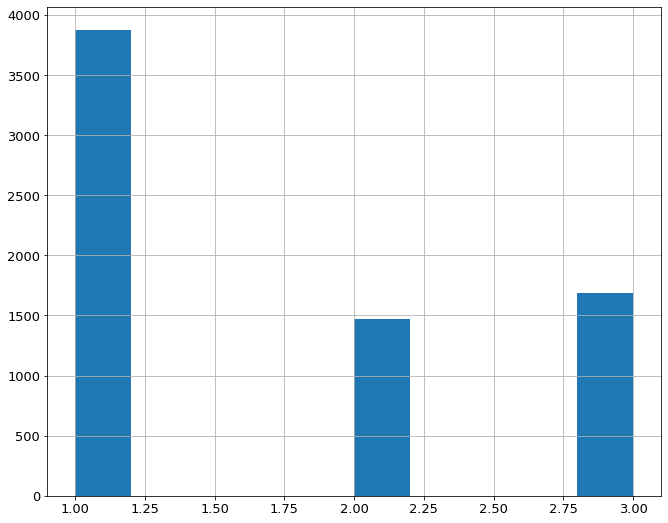

internet_service_type_id


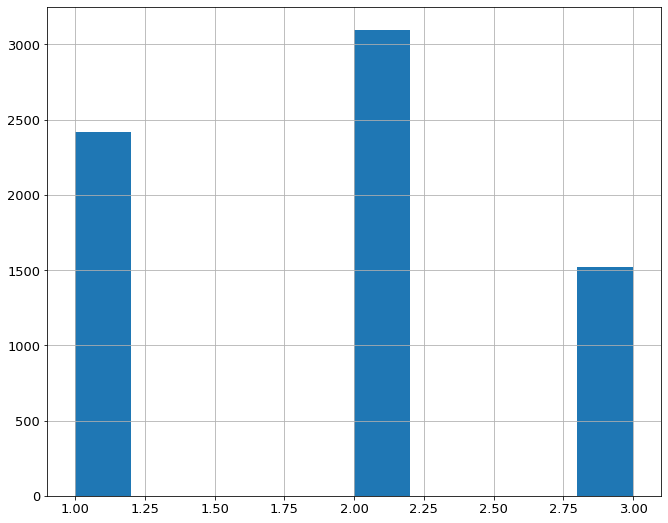

senior_citizen


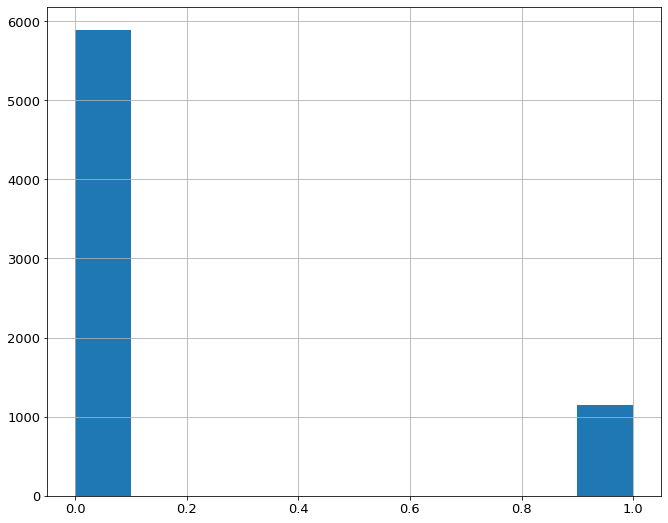

tenure_mths


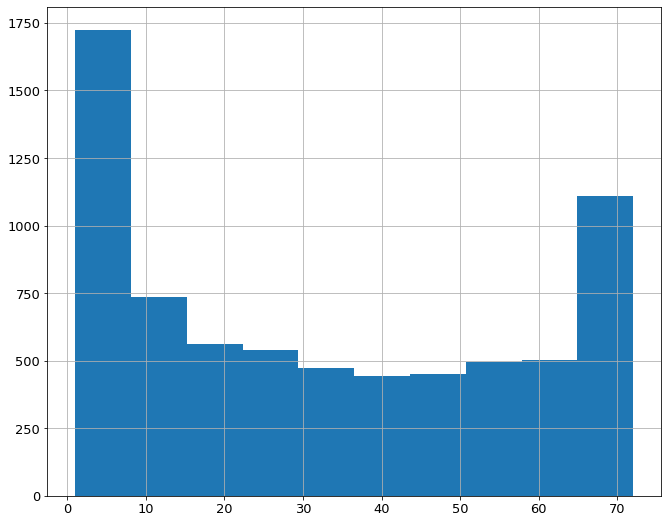

monthly_charges


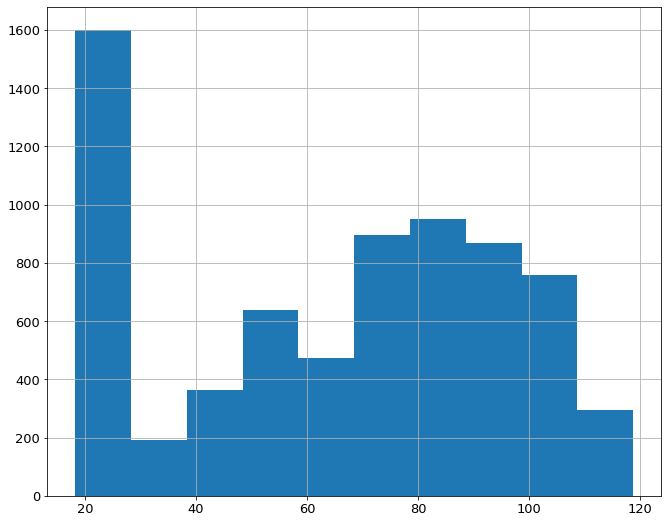

total_charges


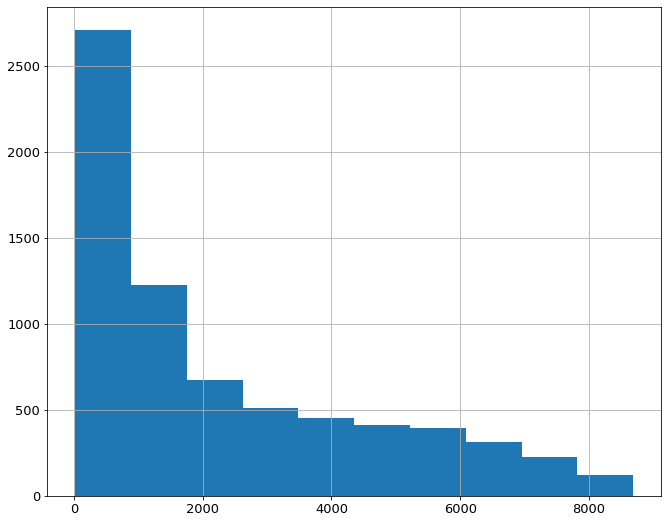

In [19]:
#histograms of numeric columns
for col in numcols:
    print(col)
    telco_df[col].hist()
    plt.show()

In [20]:
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']

In [21]:
catcols

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

#### Creating a list of the categoric data types and checking the values in each

In [22]:
for col in catcols:
    print(f"Column: {col}")
    print(telco_df[col].value_counts())
    print("--------")
    print(telco_df[col].value_counts(normalize=True, dropna=False))
    print("=================")

Column: customer_id
0002-ORFBO    1
6619-RPLQZ    1
6629-LADHQ    1
6629-CZTTH    1
6627-CFOSN    1
             ..
3359-DSRKA    1
3354-OADJP    1
3352-RICWQ    1
3352-ALMCK    1
9995-HOTOH    1
Name: customer_id, Length: 7032, dtype: int64
--------
0002-ORFBO    0.000142
6619-RPLQZ    0.000142
6629-LADHQ    0.000142
6629-CZTTH    0.000142
6627-CFOSN    0.000142
                ...   
3359-DSRKA    0.000142
3354-OADJP    0.000142
3352-RICWQ    0.000142
3352-ALMCK    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7032, dtype: float64
Column: gender
Male      3549
Female    3483
Name: gender, dtype: int64
--------
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
Column: partner
No     3639
Yes    3393
Name: partner, dtype: int64
--------
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
Column: dependents
No     4933
Yes    2099
Name: dependents, dtype: int64
--------
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
Column: phone

### Convert churn to 1/0 instead of Yes or No

In [23]:
telco_df['churn'] = np.where(telco_df.churn == 'Yes',1,0)
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure_mths,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,0,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,0,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,1,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,1,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.40,1,Fiber optic,Month-to-month,Mailed check


### Converting gender to 1/0 - 1 for Male 0 for Female

In [24]:
telco_df['gender'] = np.where(telco_df.gender == 'Male',1,0)
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure_mths,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,0,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,0,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,1,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,0,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,1,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,1,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,1,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,1,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,0,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.40,1,Fiber optic,Month-to-month,Mailed check


### Converting Remainder yes or No to 1/0

In [25]:
telco_df.payment_type.head(20)

0                  Mailed check
1                  Mailed check
2              Electronic check
3              Electronic check
4                  Mailed check
5       Credit card (automatic)
6     Bank transfer (automatic)
7       Credit card (automatic)
8              Electronic check
9                  Mailed check
10      Credit card (automatic)
11      Credit card (automatic)
12             Electronic check
13    Bank transfer (automatic)
14    Bank transfer (automatic)
15      Credit card (automatic)
16                 Mailed check
17             Electronic check
18      Credit card (automatic)
19             Electronic check
Name: payment_type, dtype: object

In [26]:
telco_df['payment_type'] = telco_df.payment_type.replace({'Electronic check': 0,'Mailed check': 0, 
                                                          'Bank transfer (automatic)': 1, 
                                                          'Credit card (automatic)': 1})


In [27]:
telco_df['online_security'] = telco_df.online_security.replace({'No internet service': 0, 'No': 0, 'Yes': 1})
telco_df['online_backup'] = telco_df.online_backup.replace({'No internet service': 0, 'No': 0, 'Yes': 1})
telco_df['device_protection'] = telco_df.device_protection.replace({'No internet service': 0, 'No': 0, 'Yes': 1})
telco_df['tech_support'] = telco_df.tech_support.replace({'No internet service': 0, 'No': 0, 'Yes': 1})
telco_df['contract_type'] = telco_df.contract_type.replace({'Month-to-month':0, 'One year':1, 'Two year':2})
telco_df['internet_service_type'] = telco_df.internet_service_type.replace({'None': 0, 'DSL': 1, 'Fiber optic': 1})
telco_df = telco_df.drop('internet_service_type_id',axis=1)
telco_df = telco_df.rename(columns = {'payment_type':'automatic_payment'})
telco_df['partner'] = telco_df['partner'].replace({'No': 0, 'Yes': 1})
telco_df['dependents'] = telco_df['dependents'].replace({'No': 0, 'Yes': 1})
telco_df['phone_service'] = telco_df['phone_service'].replace({'No': 0, 'Yes': 1})
telco_df['paperless_billing'] = telco_df['paperless_billing'].replace({'No': 0, 'Yes': 1})
telco_df['multiple_lines'] = telco_df.multiple_lines.replace({'No phone service': 0, 'No': 1, 'Yes': 2})
telco_df['streaming_movies'] = telco_df.streaming_movies.replace({'No internet service': 0, 'No': 0, 'Yes': 1})
telco_df['streaming_tv'] = telco_df.streaming_tv.replace({'No internet service': 0, 'No': 0, 'Yes': 1})

telco_df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,0,1,1,1,0
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure_mths,9,9,4,13,3
phone_service,1,1,1,1,1
multiple_lines,1,2,1,1,1


In [28]:
# Concatenate the dummy_df dataframe above with the original df and validate.
dummy_df = pd.get_dummies(telco_df.gender, drop_first=True)
df = pd.concat([telco_df, dummy_df], axis=1)
df = df.drop(['gender','phone_service'], axis=1)
df.head(1)


,payment_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure_mths,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,automatic_payment,1
0,2,2,0002-ORFBO,0,1,1,9,1,0,1,...,1,0,1,65.6,593.3,0,1,1,0,0


### Convert categorical variables into dummmy variables

In [29]:
dummy_df = pd.get_dummies(telco_df)
dummy_df.head()

,payment_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure_mths,phone_service,multiple_lines,online_security,...,customer_id_9975-SKRNR,customer_id_9978-HYCIN,customer_id_9979-RGMZT,customer_id_9985-MWVIX,customer_id_9986-BONCE,customer_id_9987-LUTYD,customer_id_9992-RRAMN,customer_id_9992-UJOEL,customer_id_9993-LHIEB,customer_id_9995-HOTOH
0,2,2,0,0,1,1,9,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,9,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,4,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,13,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,1,0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Are there any dupes?

In [30]:
dummy_df.shape 

(7032, 7054)

In [31]:
dummy_df.drop_duplicates(inplace=True)

In [32]:
dummy_df.shape

(7032, 7054)

# Step 3. Explore

## Split Data explore on Train only

In [33]:
def train_validate_test_split(telco_churn):
    '''
    Takes in the telco_data and returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(telco_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=telco_df.churn)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

train, validate, test = train_validate_test_split(df)
    
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 23)
validate -> (1688, 23)
test -> (1407, 23)


## Univariate Analysis
### Plot distibution of individual predictors by churn

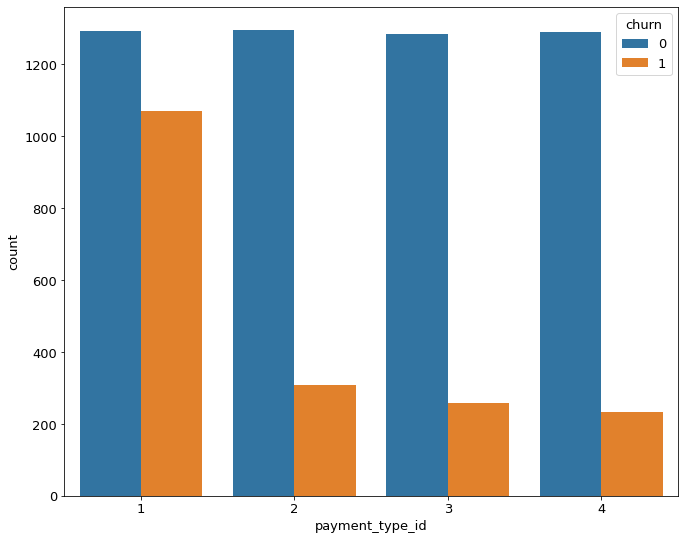

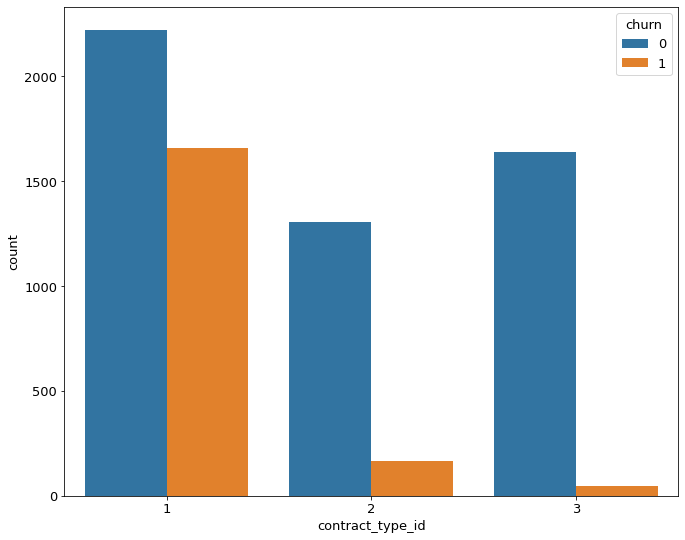

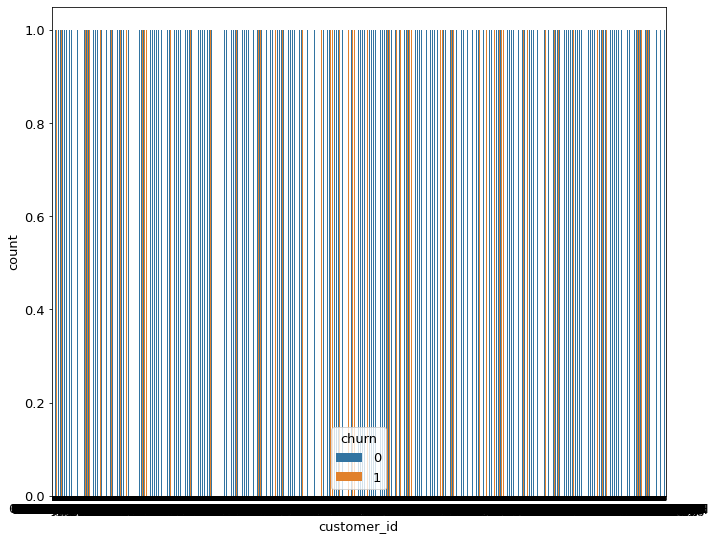

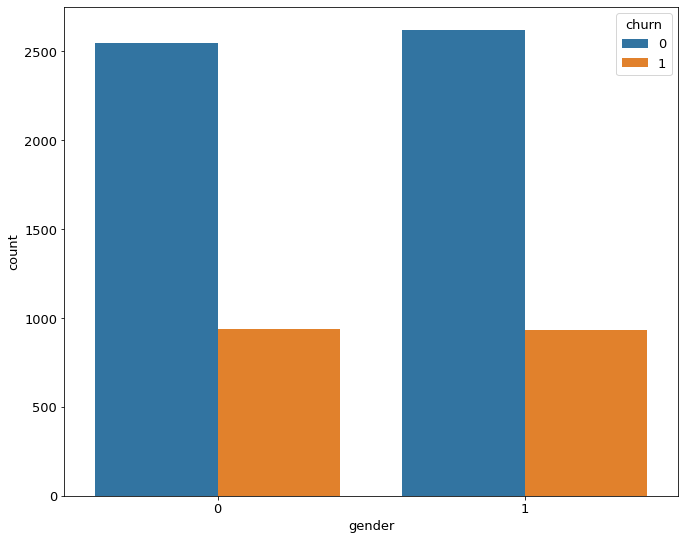

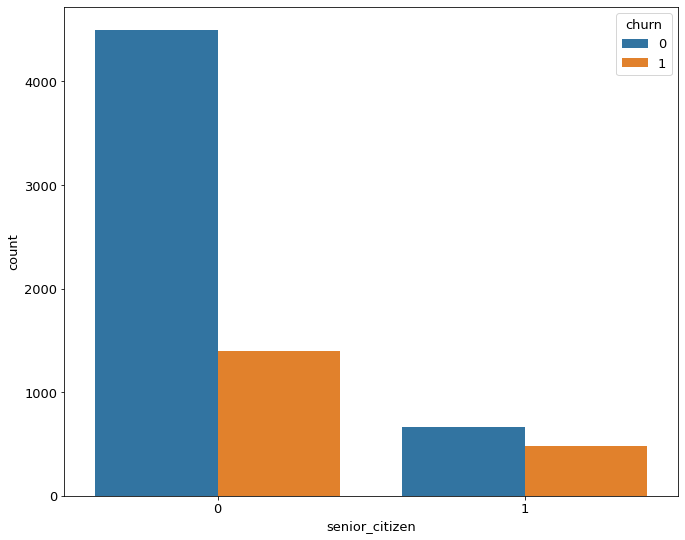

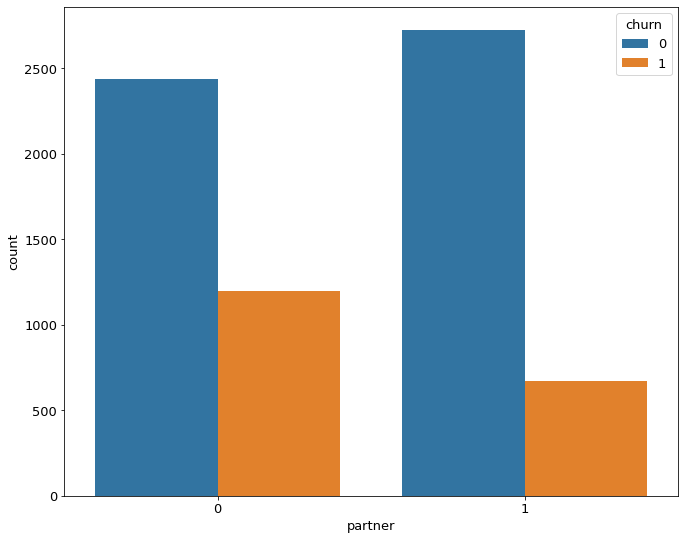

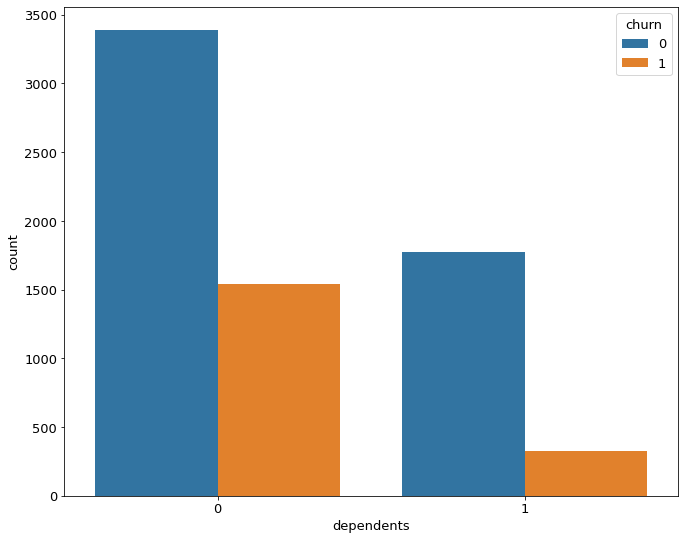

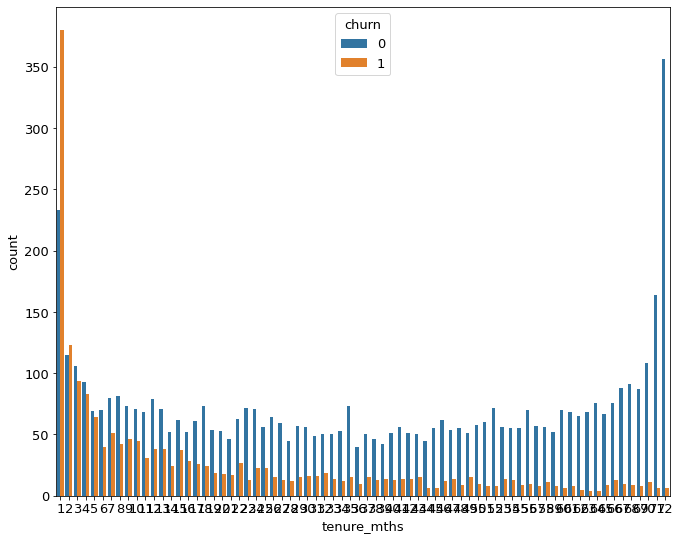

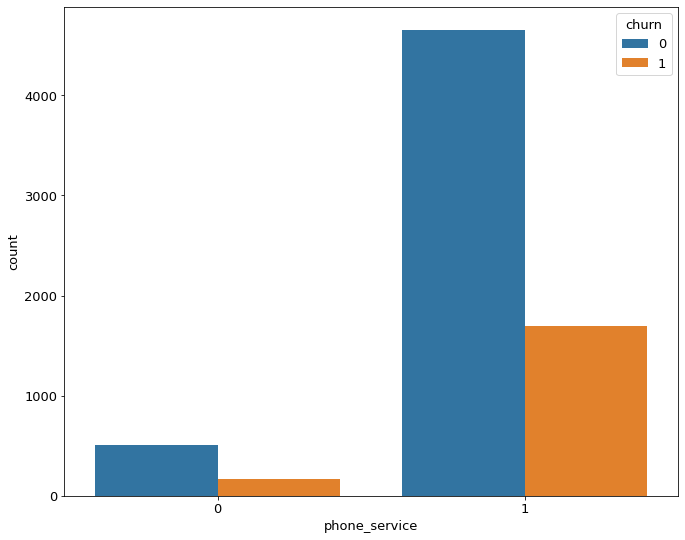

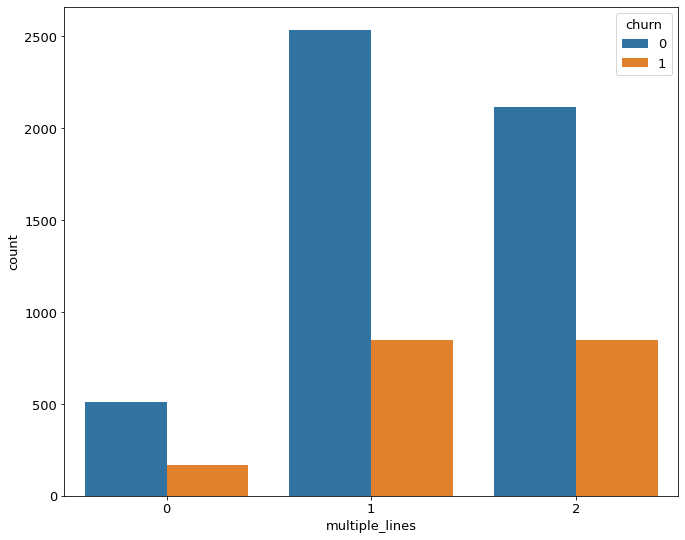

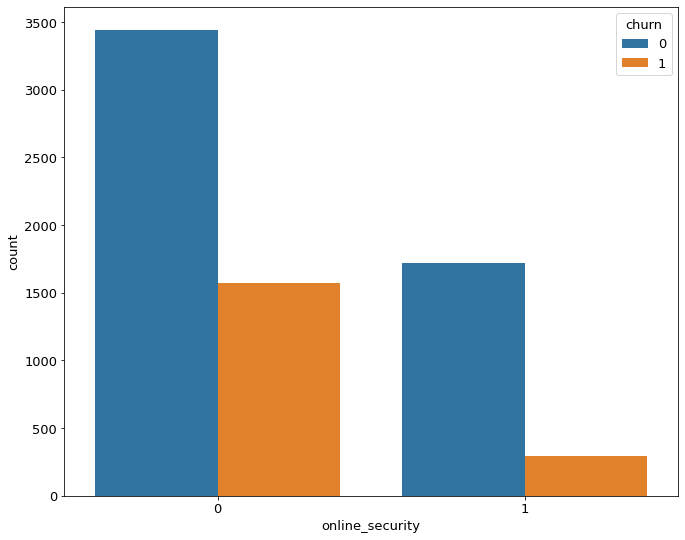

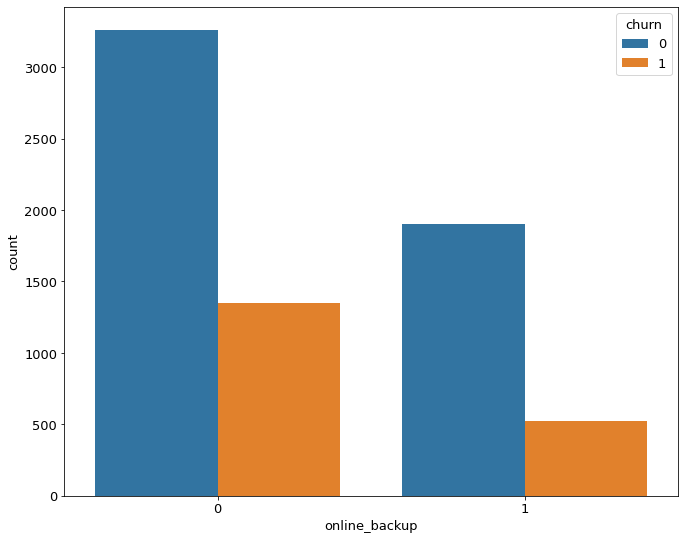

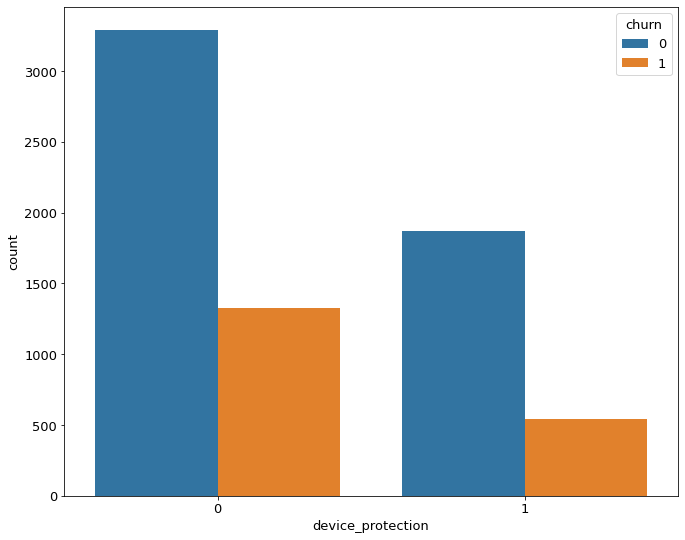

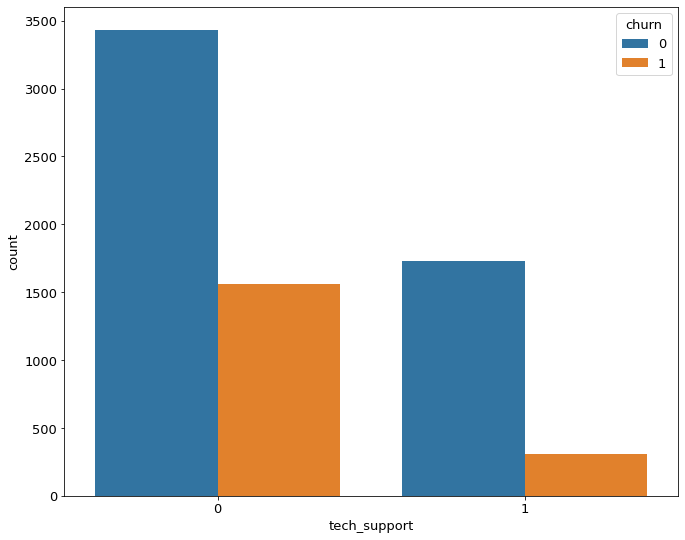

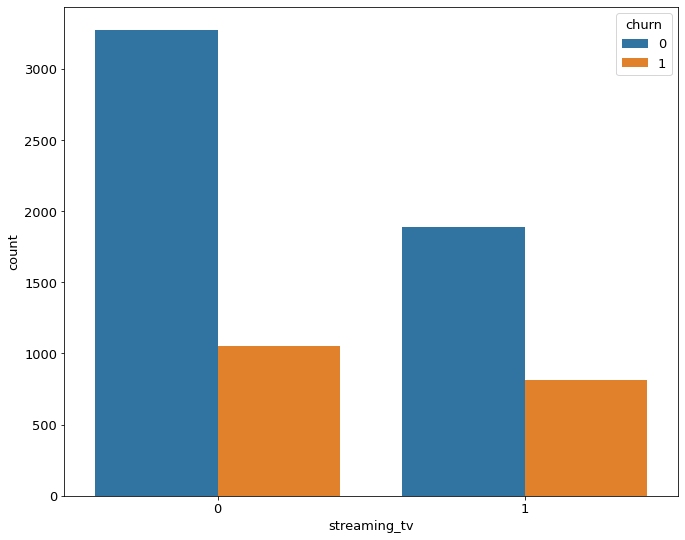

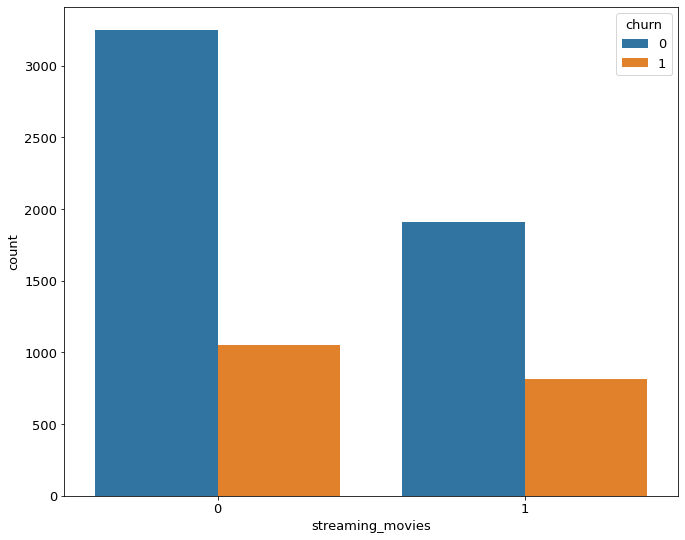

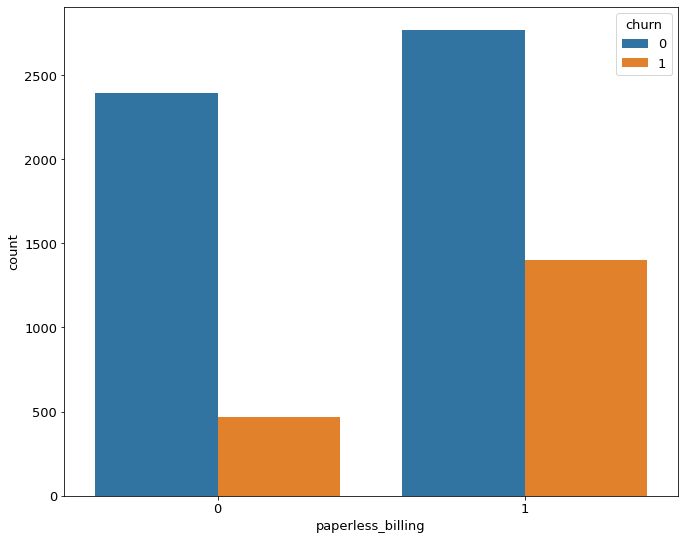

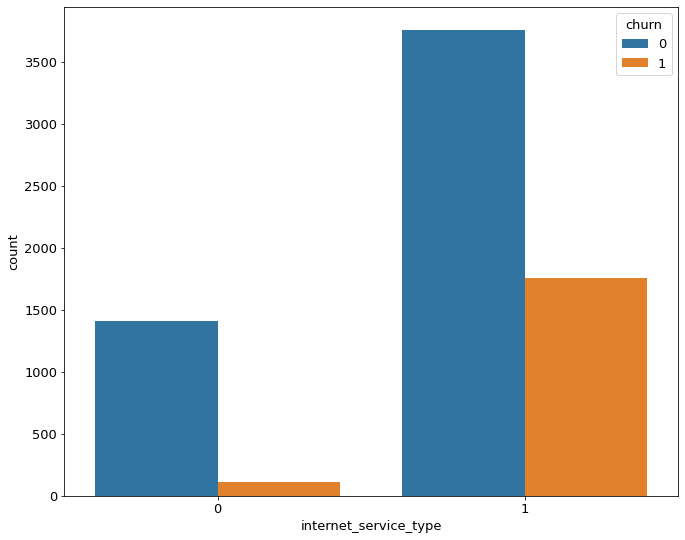

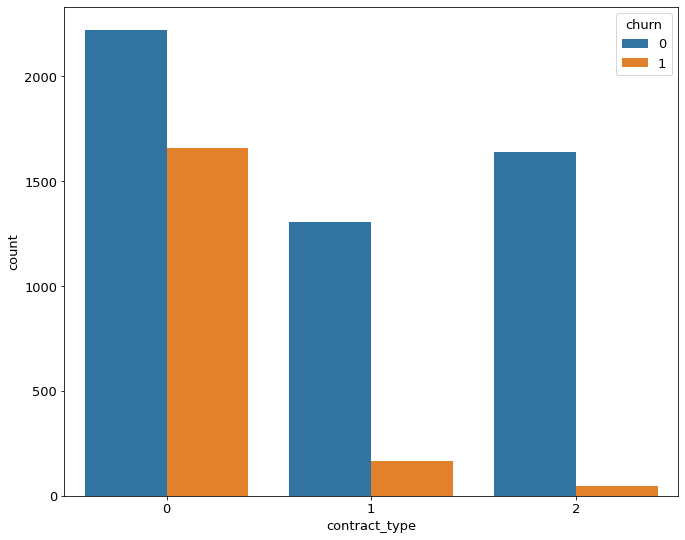

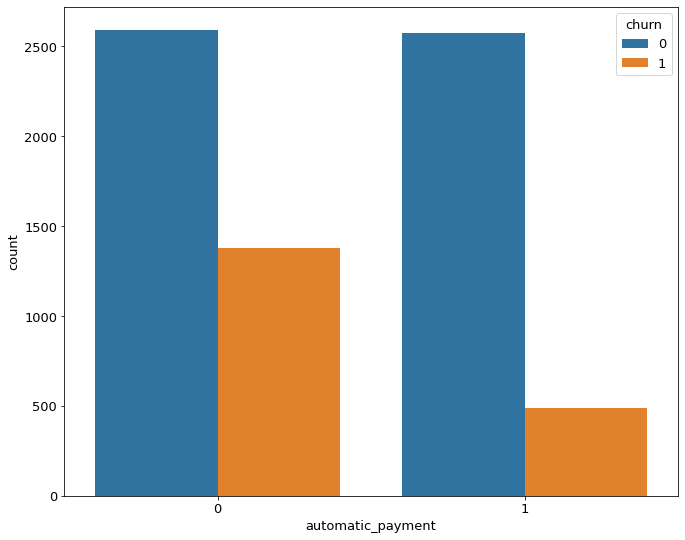

In [34]:
for i, predictor in enumerate(train.drop(columns=['churn', 'total_charges', 'monthly_charges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='churn')

### Does device protection affect different rates of churn?
- $H_0$ : device protection does not affect churn
- $H_a$ : device protection does affect a customer churning

In [35]:
alpha = 0.05
null_hypothesis = "churn and device protection are independent"
alternative_hypothesis = "there is a relationship between contract type and churn"

# Setup a crosstab of observed churn to device protection
observed = pd.crosstab(train.churn, train.device_protection)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\n',observed.values)
    print('\n',expected)
    print('\np_value:',(p))
    print(f'chi^2 = {chi2:}')
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
round(p,4)

Reject the null hypothesis that churn and device protection are independent
Sufficient evidence to move forward understanding that there is a relationship between contract type and churn

 [[1830 1061]
 [ 730  316]]

 [[1879.8475997 1011.1524003]
 [ 680.1524003  365.8475997]]

p_value: 0.00018870079690668388
chi^2 = 13.940380528973957


0.0002

### Does contract type affect different rates of churn?
- $H_0$ : contract type does not affect churn
- $H_a$ : contract type does affect a customer churning

In [36]:
alpha = 0.05
null_hypothesis = "churn and contract type are independent"
alternative_hypothesis = "there is a relationship between contract type and churn"

# Setup a crosstab of observed churn to contract_type
observed = pd.crosstab(train.churn, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and contract type are independent
Sufficient evidence to move forward understanding that there is a relationship between contract type and churn

Rounded p_value: 0.0


4.693667062132269e-145

### Does tech support affect different rates of churn?
- $H_0$ : tech support does not affect churn
- $H_a$ : tech support does affect a customer churning

In [37]:
alpha = 0.05
null_hypothesis = "churn and tech support are independent"
alternative_hypothesis = "there is a relationship between tech support and churn"

# Setup a crosstab of observed churn to tech_support
observed = pd.crosstab(train.churn, train.tech_support)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and tech support are independent
Sufficient evidence to move forward understanding that there is a relationship between tech support and churn

Rounded p_value: 0.0


2.376480997030356e-23

### Does paperless billing affect different rates of churn?
- $H_0$ : paperless billing does not affect churn
- $H_a$ : paperless billing does affect a customer churning

In [38]:
alpha = 0.05
null_hypothesis = "churn and paperless billing are independent"
alternative_hypothesis = "there is a relationship between paperless billing and churn"

# Setup a crosstab of observed churn to paperless_billing
observed = pd.crosstab(train.churn, train.paperless_billing)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and paperless billing are independent
Sufficient evidence to move forward understanding that there is a relationship between paperless billing and churn

Rounded p_value: 0.0


1.3393723943150956e-32

### Does payment type affect different rates of churn?
- $H_0$ : paying a specific way does not affect churn
- $H_a$ : payment type does affect a customer churning

In [39]:
alpha = 0.05
null_hypothesis = "churn and payment type are independent"
alternative_hypothesis = "there is a relationship between payment type and churn"

# Setup a crosstab of observed churn to automatic_payment
observed = pd.crosstab(train.churn, train.automatic_payment)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and payment type are independent
Sufficient evidence to move forward understanding that there is a relationship between payment type and churn

Rounded p_value: 0.0


6.846414201167442e-36

### Does online security affect different rates of churn?
- $H_0$ : having online security does not affect churn
- $H_a$ : online security does affect a customer churning

In [40]:
alpha = 0.05
null_hypothesis = "churn and onilne security are independent"
alternative_hypothesis = "there is a relationship between online security and churn"

# Setup a crosstab of observed churn to online_security
observed = pd.crosstab(train.churn, train.online_security)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and onilne security are independent
Sufficient evidence to move forward understanding that there is a relationship between online security and churn

Rounded p_value: 0.0


1.2131172913764837e-29

### Does being a senor citizen affect different rates of churn?
- $H_0$ : Being a senior citizen does not affect churn
- $H_a$ : Being a senior citizen does affect a customer churning

In [41]:
alpha = 0.05
null_hypothesis = "churn and senior citizens are independent"
alternative_hypothesis = "there is a relationship between senior citizen and churn"

# Setup a crosstab of observed churn to senior_citizen
observed = pd.crosstab(train.churn, train.senior_citizen)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and senior citizens are independent
Sufficient evidence to move forward understanding that there is a relationship between senior citizen and churn

Rounded p_value: 0.0


1.7561315684822571e-23

### Note: online security, tech support, and device protection are all related to whether or not a customer has internet service

# Other observations made

### Using a kernel density estimate (KDE) plot shows churn is high when monthly charges are high.

<function prepare.percentage_stacked_plot(columns_to_plot, title, telco_df)>

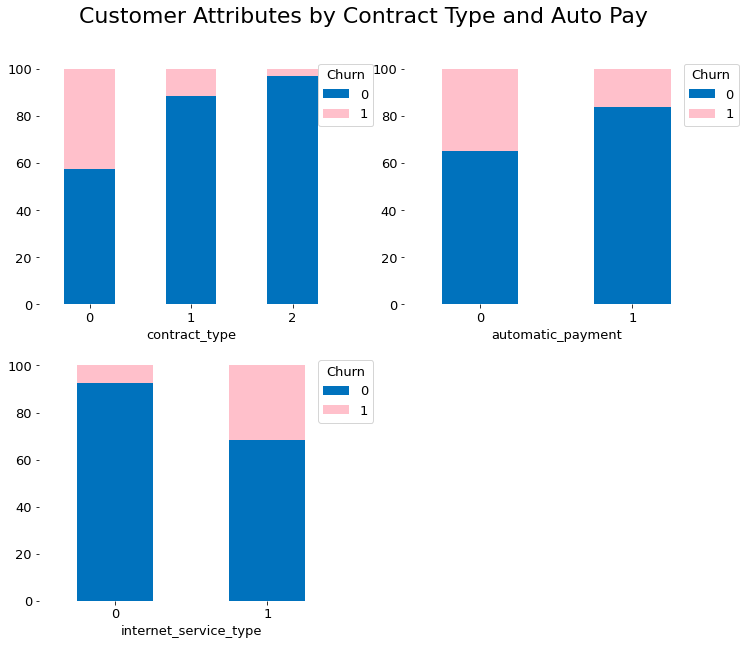

In [80]:
# Attributes of a customer's account
account_columns = ['contract_type', 'automatic_payment', 'internet_service_type']

# stacked plot of these attributes
percentage_stacked_plot(account_columns, 'Customer Attributes by Contract Type and Auto Pay', telco_df)

# contract type 0 is month to month, 1 is one-year, 2 is two-year
# other 0 and 1 is no and yes

<AxesSubplot:xlabel='tenure_mths', ylabel='Density'>

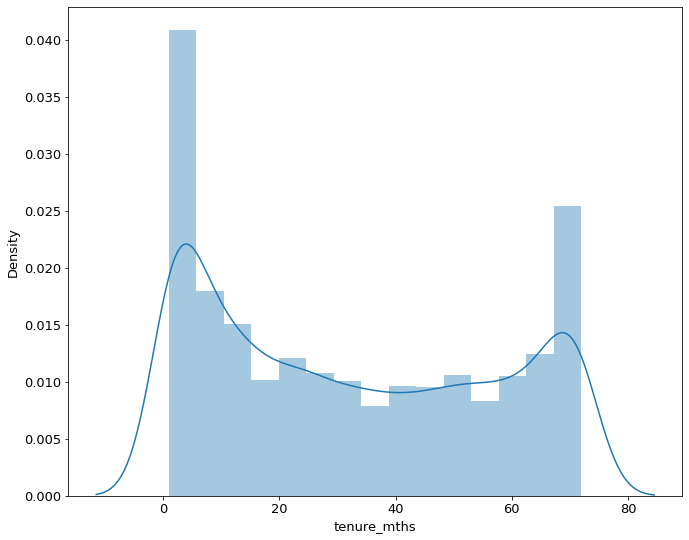

In [43]:
sns.distplot(telco_df.tenure_mths)

<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

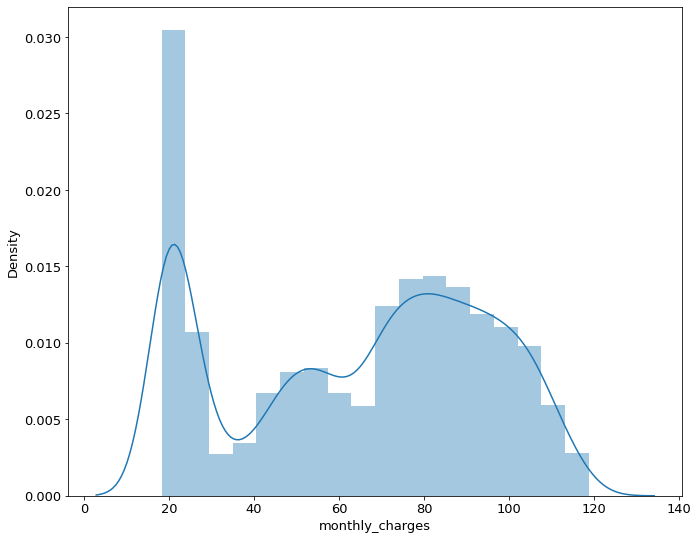

In [44]:
sns.distplot(telco_df.monthly_charges)

Text(0.5, 1.0, 'Monthly charges by churn')

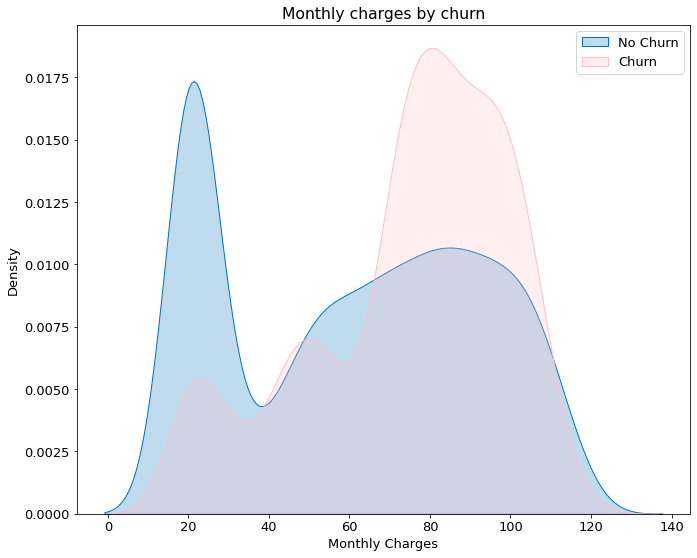

In [45]:
Mth = sns.kdeplot(train.monthly_charges[(train["churn"] == 0) ],
                color="#0072BD", shade = True)
Mth = sns.kdeplot(train.monthly_charges[(train["churn"] == 1) ],
                ax =Mth, color="pink", shade= True)
Mth.legend(["No Churn","Churn"])
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

### Do monthly charges affect different rates of churn?
- $H_0$ : Monthly charges does not affect churn
- $H_a$ : Monthly charges does affect a customer churning

In [46]:
alpha = 0.05
null_hypothesis = "churn and monthly charges are independent"
alternative_hypothesis = "there is a relationship between monthly charges and churn"

# Setup a crosstab of observed churn and monthly_charges
observed = pd.crosstab(train.churn, train.monthly_charges)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
    print('\nRounded p_value:',round(p,2))
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that churn and monthly charges are independent
Sufficient evidence to move forward understanding that there is a relationship between monthly charges and churn

Rounded p_value: 0.0


1.7696616579595508e-06

### Churn is higher with lower total charges but this is due to a smaller tenure period.

Text(0.5, 1.0, 'Total charges by churn')

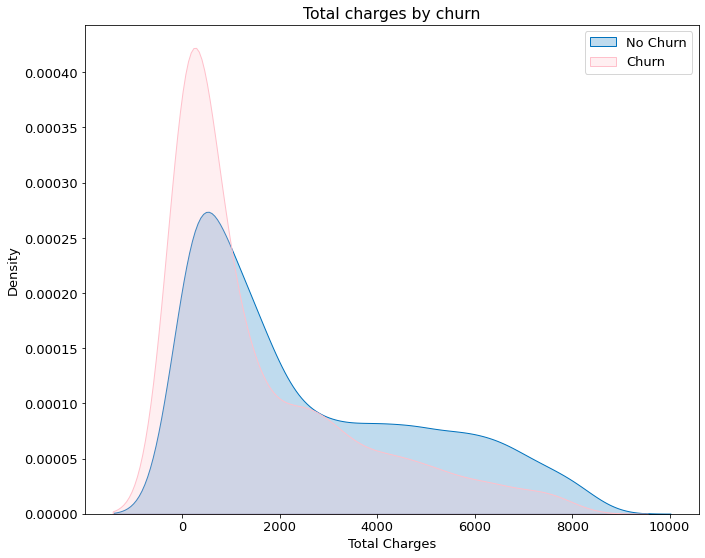

In [47]:
Tot = sns.kdeplot(train.total_charges[(train["churn"] == 0) ],
                color="#0072BD", shade = True)
Tot = sns.kdeplot(train.total_charges[(train["churn"] == 1) ],
                ax =Tot, color="pink", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

### Here we see the correlation closest to churn

<AxesSubplot:>

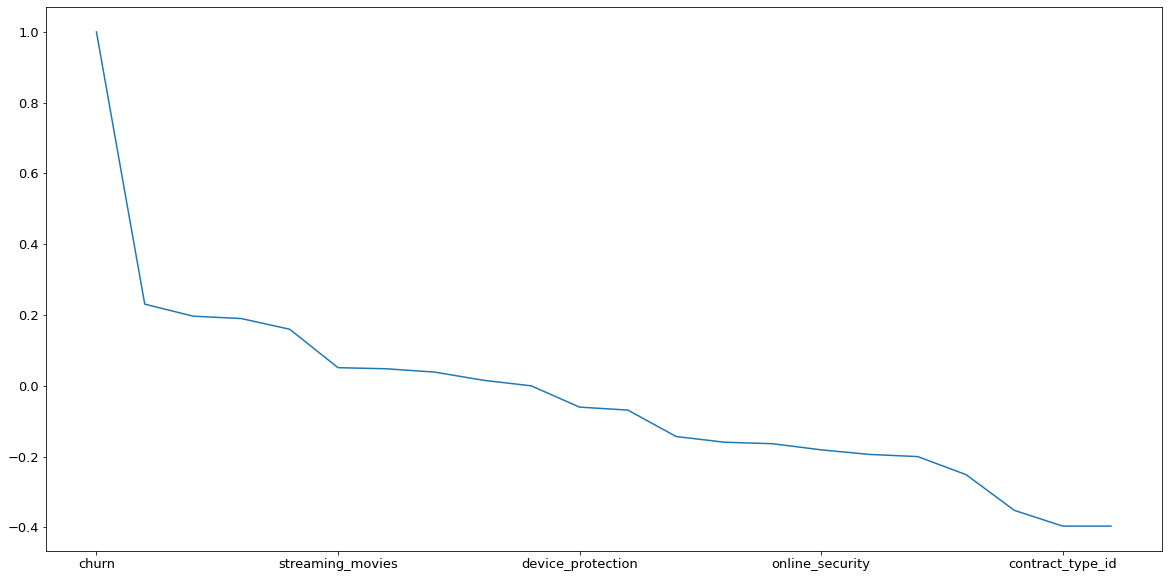

In [48]:
plt.figure(figsize=(20,10))
train.corr()['churn'].sort_values(ascending = False).plot(kind='line')

# Key takeaways

- Customers likely to churn fit the following:

    1. Have no partners.
    
    2. Pay by electronic check.
    
    3. In a month-to-month contract.
    
    4. Do not have online security, tech support, and device protection one their internet service plan.

# Step 4. Modeling

In [49]:
# predictor/independent features split into train, test, validate
X_train = train.drop(columns = ['churn'],axis=1)
X_validate = validate.drop(columns = ['churn'],axis=1)
X_test = test.drop(columns = ['churn'],axis=1)

# target variables split into train, test, validate
y_train = train.churn
y_validate = validate.churn
y_test = test.churn

In [50]:
y_train.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

### Majority of customers (73.4%) do not churn - baseline prediction

In [51]:
y_train.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [52]:
baseline = train.churn.mode()
baseline

0    0
dtype: int64

In [53]:
# Creating data frame of Actual churn
df = pd.DataFrame(y_train)

# Adding baseline as prediction, not churned for every observation
df['baseline'] = 0

# Renaming the columns
df.columns = ['actual','baseline']

# checking the df
df

,actual,baseline
5919,0,0
1915,0,0
5054,0,0
2355,0,0
6279,0,0
...,...,...
394,0,0
3763,1,0
3444,0,0
1002,0,0


### Create a cross tab of our baseline versus actual to calculate accuracy

In [54]:
pd.crosstab(df.actual, df.baseline)

baseline,0
actual,
0,2891
1,1046


In [55]:

pd.crosstab(df['baseline'], df['actual'])

actual,0,1
baseline,,
0,2891,1046


In [56]:
confusion_matrix(df.actual, df.baseline,
                labels = (1, 0))

array([[   0, 1046],
       [   0, 2891]])

In [57]:
# calculate accuracy
# positive will not be churned
# (TP + TN) / (TP + TN + FP + FN)

#predicting not churned and the customer has not churned
TP = 2891

#predicting not churned and the customer has churned
FP = 1046

#predicting the customer has churned and they have churned
TN = 0

#predicting the customer has churned and they have not churned
FN = 0

base_accuracy = (TP + TN) / (TP + TN + FP + FN)

print("The baseline model is",(base_accuracy * 100),"%.")

The baseline model is 73.43154686309373 %.


In [58]:
model_accuracy = (df.baseline == df.actual).mean()

print(f'   model accuracy: {model_accuracy:.2%}')

   model accuracy: 73.43%


In [59]:
df.actual.value_counts()

0    2891
1    1046
Name: actual, dtype: int64

In [60]:
df['baseline_prediction'] = '0'

# Logistic Regression Model

In [61]:
#features and weights
X_train = X_train[['online_security','tech_support','device_protection','monthly_charges']]
y_train = train.churn

In [62]:
# Created a simple Logistic Regression model to start.
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)
print('Coefficient: \n', logit.coef_)
print('\nIntercept: \n', logit.intercept_)

Coefficient: 
 [[-1.1615111  -1.0383524  -0.754254    0.03103148]]

Intercept: 
 [-2.3318484]


In [63]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [64]:
print('\nThe confusion matrix:\n',confusion_matrix(y_train, y_pred))
print('\nClassification report:\n',classification_report(y_train, y_pred))
print('\nAccuracy of Logistic Regression classifier on training set:',logit.score(X_train, y_train))


The confusion matrix:
 [[2651  240]
 [ 722  324]]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2891
           1       0.57      0.31      0.40      1046

    accuracy                           0.76      3937
   macro avg       0.68      0.61      0.62      3937
weighted avg       0.73      0.76      0.73      3937


Accuracy of Logistic Regression classifier on training set: 0.7556515113030227


# Logistic Regression Model Validation

In [65]:
X_validate = X_validate[['online_security','tech_support','device_protection','monthly_charges']]
y_validate = validate.churn

In [66]:
y_pred = logit.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))
print('\nAccuracy of Logistic Regression classifier on validate set:',logit.score(X_validate, y_validate))

[[1120  119]
 [ 311  138]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1239
           1       0.54      0.31      0.39       449

    accuracy                           0.75      1688
   macro avg       0.66      0.61      0.61      1688
weighted avg       0.72      0.75      0.72      1688


Accuracy of Logistic Regression classifier on validate set: 0.745260663507109


# Random Forest Model

In [67]:
X_train_ran = X_train[['online_security','tech_support','device_protection','monthly_charges']]
y_train_ran = train.churn

In [68]:
rf = RandomForestClassifier(max_depth = 5)

rf.fit(X_train_ran, y_train_ran)

y_pred_ran = rf.predict(X_train_ran)

y_pred_proba_ran = rf.predict_proba(X_train_ran)

In [69]:
#print(rf.feature_importances_)

print('\nThe confusion matrix:\n',confusion_matrix(y_train_ran, y_pred_ran))
print('\nClassification report:\n',classification_report(y_train_ran, y_pred_ran))

print('Accuracy of Random Forest classifier on training set:',rf.score(X_train_ran, y_train_ran))


The confusion matrix:
 [[2655  236]
 [ 666  380]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      2891
           1       0.62      0.36      0.46      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.64      0.66      3937
weighted avg       0.75      0.77      0.75      3937

Accuracy of Random Forest classifier on training set: 0.7708915417830836


# Random Forest Validation

In [70]:
y_pred_ran = rf.predict(X_validate)

print(confusion_matrix(y_validate, y_pred_ran))
print(classification_report(y_validate, y_pred_ran))

print('\nAccuracy of Random Forest classifier on validate set:',rf.score(X_validate, y_validate))

[[1111  128]
 [ 285  164]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1239
           1       0.56      0.37      0.44       449

    accuracy                           0.76      1688
   macro avg       0.68      0.63      0.64      1688
weighted avg       0.73      0.76      0.74      1688


Accuracy of Random Forest classifier on validate set: 0.7553317535545023


# KNN Model

In [71]:
X_train_knn = X_train[['online_security','tech_support','device_protection','monthly_charges']]
y_train_knn = train.churn

In [72]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_train_knn)

y_pred_proba_knn = knn.predict_proba(X_train_knn)

In [73]:
print('\nThe confusion matrix:\n',confusion_matrix(y_train_knn, y_pred_knn))
print('\nClassification report:\n',classification_report(y_train_knn, y_pred_knn))
print('Accuracy of KNN classifier on training set:',knn.score(X_train_knn, y_train_knn))


The confusion matrix:
 [[2705  186]
 [ 650  396]]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.68      0.38      0.49      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.66      0.68      3937
weighted avg       0.77      0.79      0.77      3937

Accuracy of KNN classifier on training set: 0.7876555753111506


# KNN Model Validation

In [74]:
y_pred_knn = knn.predict(X_validate)

print(confusion_matrix(y_validate, y_pred_knn))
print(classification_report(y_validate, y_pred_knn))

print('\nAccuracy of KNN classifier on validate set:',knn.score(X_validate, y_validate))

[[1105  134]
 [ 306  143]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1239
           1       0.52      0.32      0.39       449

    accuracy                           0.74      1688
   macro avg       0.65      0.61      0.61      1688
weighted avg       0.71      0.74      0.72      1688


Accuracy of KNN classifier on validate set: 0.7393364928909952


# Test Logistic Regression Model

In [75]:
X_test = X_test[['online_security','tech_support','device_protection','monthly_charges']]
y_test = test.churn

In [76]:
y_pred = logit.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('\nAccuracy of Logistic Regression classifier on test set:',logit.score(X_test, y_test))

[[946  87]
 [255 119]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1033
           1       0.58      0.32      0.41       374

    accuracy                           0.76      1407
   macro avg       0.68      0.62      0.63      1407
weighted avg       0.73      0.76      0.73      1407


Accuracy of Logistic Regression classifier on test set: 0.7569296375266524


#### Basline accuracy is 73.43%
### Logistic Regression model accuracy is 77.40%

# Prediction CSV File

In [77]:
X = telco_df[['online_security','tech_support','device_protection','monthly_charges']]

telco_df['prediction'] = logit.predict(X)
telco_df.head(1)

,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure_mths,phone_service,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,automatic_payment,prediction
0,2,2,0002-ORFBO,0,0,1,1,9,1,1,...,1,0,1,65.6,593.3,0,1,1,0,0


In [78]:
predictions = telco_df[['customer_id', 'prediction']]
predictions.head()

,customer_id,prediction
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,0
3,0011-IGKFF,0
4,0013-EXCHZ,0


In [79]:
predictions.to_csv('predictions.csv')

## these are the steps I took following the data science pipeline